<a href="https://colab.research.google.com/github/daretoosint/Portfolio_Inda/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import libraries#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset#
credit_card = pd.read_csv('/content/creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#explanatory data analysis#
rows, columns = credit_card.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 284807
Number of Columns: 31


In [7]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit_card.duplicated().sum()

1081

In [11]:
credit_card.duplicated().any()

True

In [12]:
credit_card.shape

(284807, 31)

In [13]:
#remove duplicates#
credit_card_new = credit_card.drop_duplicates()
credit_card_new.shape

(283726, 31)

In [14]:
print(f"Duplicate Transaction:",284807 - 283726)

Duplicate Transaction: 1081


In [15]:
credit_card_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
credit_card_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
credit_card_new.duplicated().any()

False

In [18]:
credit_card_new.shape

(283726, 31)

In [19]:
credit_card_new['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class'>

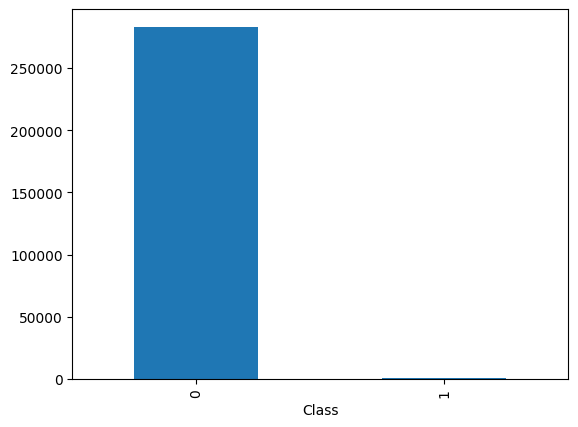

In [20]:
credit_card_new['Class'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

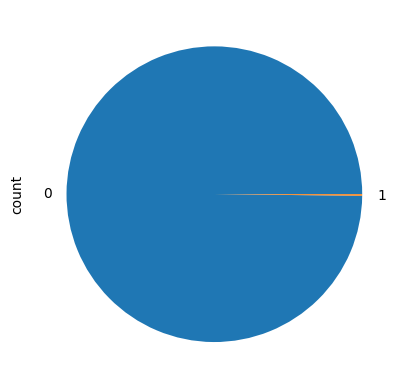

In [21]:
credit_card_new['Class'].value_counts().plot(kind = 'pie')

In [22]:
fraud,legitimate = credit_card_new['Class'].value_counts()

print(f"Fraud Transaction(0): {fraud}")
print(f"Legitimate Transaction (1): {legitimate}")
print(f"This is imbalance data")

Fraud Transaction(0): 283253
Legitimate Transaction (1): 473
This is imbalance data


In [25]:
fraud = credit_card_new[credit_card_new['Class']==0]
legitimate = credit_card_new[credit_card_new['Class']==1]

In [26]:
#statistics data#
credit_card_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Y - dependent variable;
X - independent variable

In [27]:
#class is our target column#
X = credit_card_new.drop('Class', axis=1)
Y = credit_card_new['Class']

Handle duplication

In [28]:
X.shape

(283726, 30)

In [29]:
Y.shape

(283726,)

In [ ]:
# !pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
# specify random state for reproducibility
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X, Y)

In [32]:
x_smote.shape

(566506, 30)

In [33]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [34]:
from collections import Counter

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


In [35]:
#data visualisation#
fraud_data = credit_card_new[credit_card_new['Class'] == 0]
legitimate_data = credit_card_new[credit_card_new['Class'] == 1]

<Axes: ylabel='Frequency'>

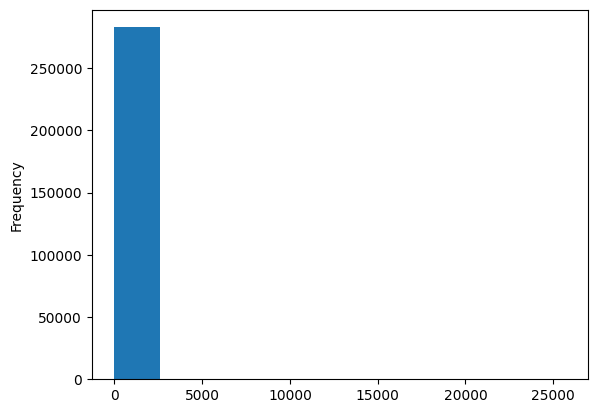

In [36]:
fraud_data['Amount'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

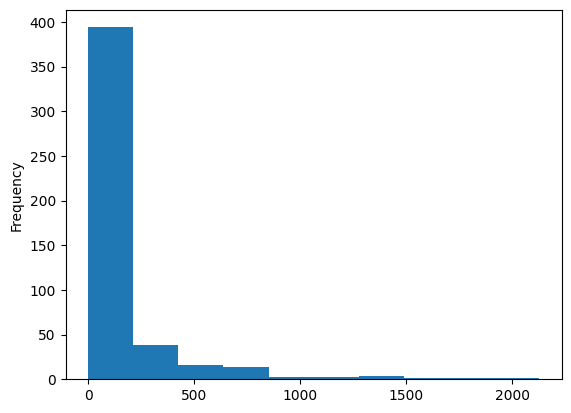

In [37]:
legitimate_data['Amount'].plot(kind = 'hist')

<Axes: >

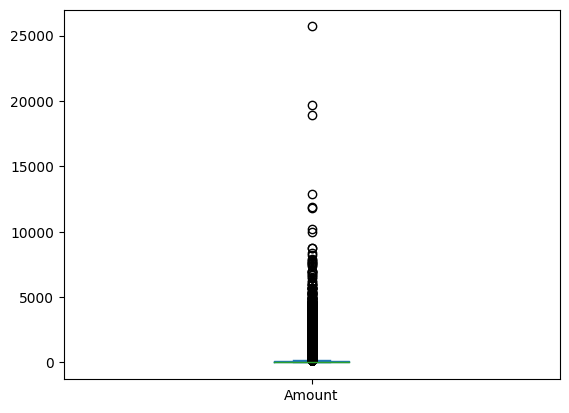

In [38]:
fraud_data['Amount'].plot(kind = 'box')

<Axes: >

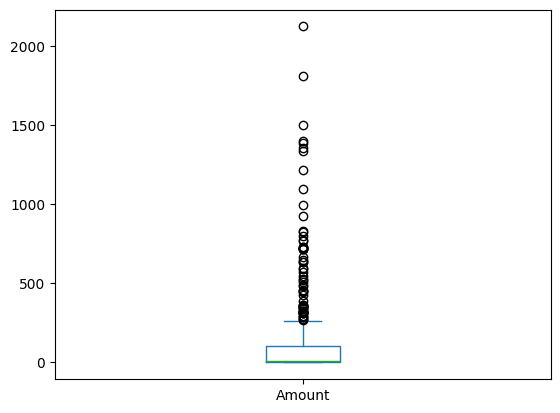

In [39]:
legitimate_data['Amount'].plot(kind = 'box')

In [40]:
corr_imbalanced = credit_card.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.745715e-12,-1.923807e-12,-1.561432e-13,-3.148554e-12,-1.688711e-13,-2.099228e-13,1.890867e-12,-6.090858e-14,...,-3.703938e-12,1.716565e-12,-1.681159e-12,-1.648431e-12,1.628679e-12,7.873718e-13,4.113542e-12,2.852165e-12,-0.227709,-0.101347
V2,-0.010593,3.745715e-12,1.000000e+00,2.356486e-12,-2.370540e-12,-2.012376e-12,1.198495e-12,5.128343e-12,1.400757e-13,4.574404e-13,...,2.574901e-12,4.417307e-14,-3.734229e-12,1.525767e-12,-1.354766e-12,-4.018679e-13,1.434207e-12,1.562770e-12,-0.531409,0.091289
V3,-0.419618,-1.923807e-12,2.356486e-12,1.000000e+00,3.640083e-14,-4.446272e-12,-6.232303e-13,3.448127e-12,-1.582292e-12,-1.221478e-12,...,-1.413990e-14,-1.069916e-12,3.502768e-12,1.769480e-12,1.171142e-12,-1.959087e-12,-2.356404e-12,4.258653e-12,-0.210880,-0.192961
V4,-0.105260,-1.561432e-13,-2.370540e-12,3.640083e-14,1.000000e+00,-2.315315e-13,1.250382e-12,-2.639007e-13,5.935086e-13,-4.716706e-13,...,-2.904359e-12,4.562272e-13,-2.353563e-12,-2.034459e-13,1.447225e-12,-2.264307e-13,7.832678e-13,-1.223710e-12,0.098732,0.133447
V5,0.173072,-3.148554e-12,-2.012376e-12,-4.446272e-12,-2.315315e-13,1.000000e+00,-2.305548e-13,1.546708e-11,-1.839653e-12,-7.354802e-13,...,-1.459983e-12,5.875037e-13,3.476447e-12,2.705039e-13,8.106651e-13,-5.592058e-13,-9.772439e-13,5.706881e-12,-0.386356,-0.094974
V6,-0.063016,-1.688711e-13,1.198495e-12,-6.232303e-13,1.250382e-12,-2.305548e-13,1.000000e+00,-2.804244e-12,-5.212531e-13,1.074195e-12,...,1.760029e-12,-1.170240e-12,-2.493300e-12,1.478954e-12,-3.376543e-12,3.772672e-12,3.084621e-12,-4.967689e-12,0.215981,-0.043643
V7,0.084714,-2.099228e-13,5.128343e-12,3.448127e-12,-2.639007e-13,1.546708e-11,-2.804244e-12,1.000000e+00,5.518070e-12,3.541206e-13,...,3.622747e-12,-7.679220e-13,-3.435246e-12,-1.873593e-12,-6.523232e-13,-2.650837e-12,-1.068647e-11,7.721035e-13,0.397311,-0.187257
V8,-0.036949,1.890867e-12,1.400757e-13,-1.582292e-12,5.935086e-13,-1.839653e-12,-5.212531e-13,5.518070e-12,1.000000e+00,-1.969555e-12,...,-4.329300e-12,-2.661966e-12,3.755720e-13,-1.990478e-12,-3.942970e-12,7.201656e-13,-2.669309e-12,1.450413e-12,-0.103079,0.019875
V9,-0.008660,-6.090858e-14,4.574404e-13,-1.221478e-12,-4.716706e-13,-7.354802e-13,1.074195e-12,3.541206e-13,-1.969555e-12,1.000000e+00,...,2.767363e-12,-2.795984e-14,-9.275401e-13,1.023814e-12,1.526834e-13,-6.958395e-13,1.959592e-12,-7.453222e-13,-0.044246,-0.097733


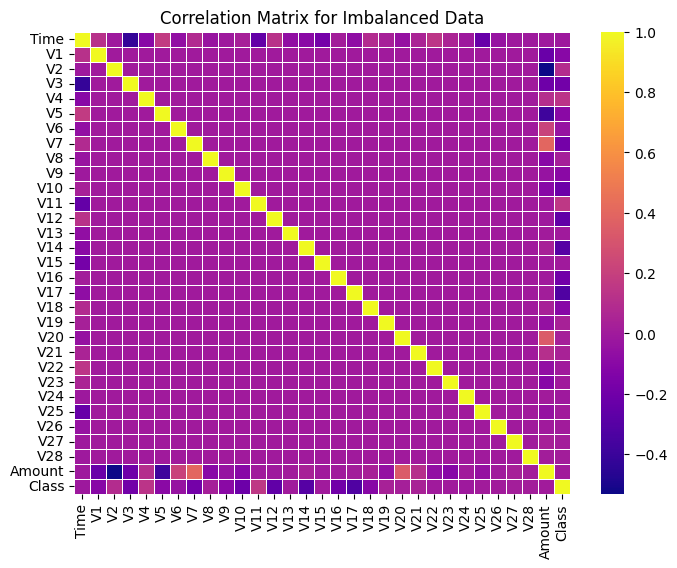

In [41]:
corr_imbalanced = credit_card.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_imbalanced, annot=False, cmap="plasma", linewidth=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show()

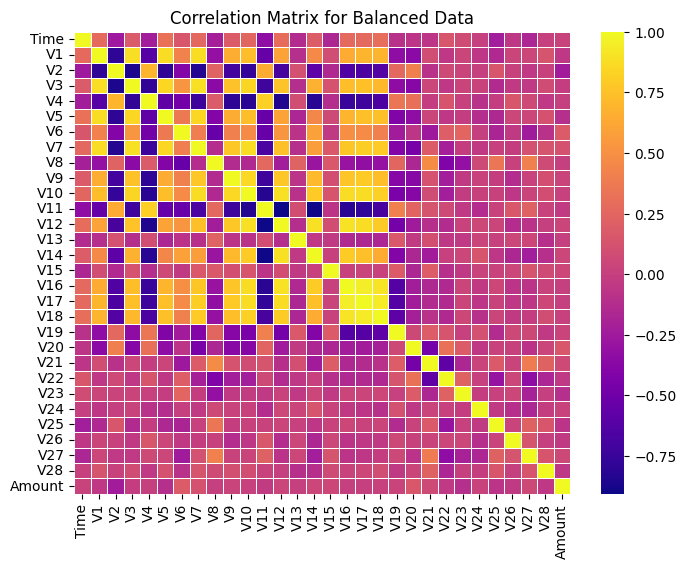

In [42]:
#correlation matrix in imbalanced data#
corr_balanced = x_smote.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_balanced, annot=False, cmap="plasma", linewidth=0.5)
plt.title("Correlation Matrix for Balanced Data")
plt.show()

<ipython-input-43-38b97332248d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=credit_card_new, palette=custom_palette)


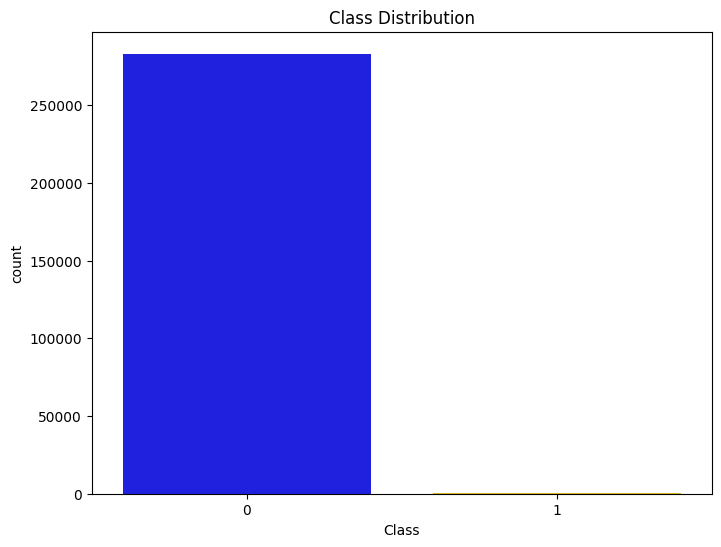

In [43]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=credit_card_new, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

<ipython-input-44-83e5463cfb48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette=custom_palette)


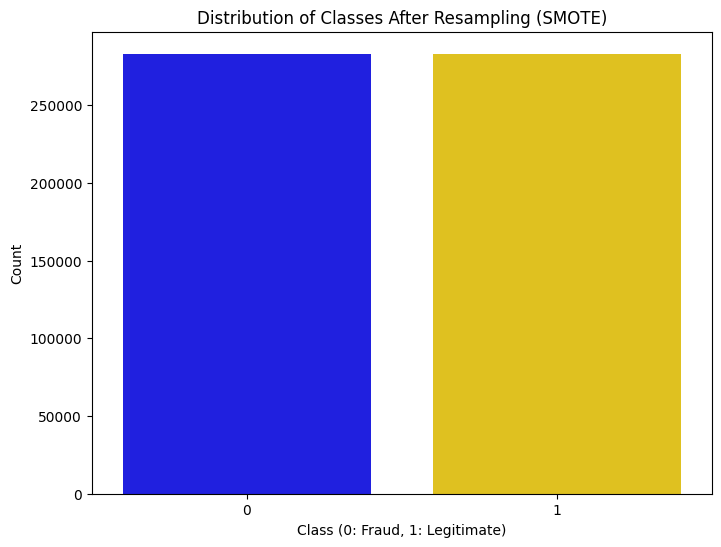

In [44]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

In [45]:
#split dataset for test and train#
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)

In [46]:
#model building#
#models will be based on logistic regression#
# build logistic regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [64]:
#Generating predictions 1.predit transactions as fraudulent or genuine by giving random sample#

In [47]:
Y_pred_logistic = logistic_model.predict(X_test)

Classification performance metrics |Accuracy: measures proportion of correctly predicted instances out of total instances |Precision: measure of a classifier's exactness. low precision indicates high number of false positives |Recall: measure of classifier's completeness. low recall indicates high number of false negatives |F1-score: weighted average of precision and recall |ROC-AUC: AUROC represents likelihood of model distinguishing observations from two classes |Confusion matrix: table showing correct predictions and types of incorrect predictions

In [48]:
#Classification report
from sklearn.metrics import confusion_matrix, classification_report
classification_report_logistic = classification_report(Y_test, Y_pred_logistic)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56463
           1       0.98      0.96      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [49]:
#confusion matrix#
confusion_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)
confusion_matrix_logistic

array([[55354,  1109],
       [ 2153, 54686]])

In [50]:
confusion_matrix_df = pd.DataFrame(confusion_matrix_logistic,
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"],
                                   index=["Actual Negative (0)", "Actual Positive (1)"])
confusion_matrix_df

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),55354,1109
Actual Positive (1),2153,54686


from matplotlib import pyplot as plt
_df_0['Predicted Negative (0)'].plot(kind='hist', bins=20, title='Predicted Negative (0)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted Positive (1)'].plot(kind='hist', bins=20, title='Predicted Positive (1)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Predicted Negative (0)', y='Predicted Positive (1)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Predicted Positive (1)']
  ys = series['Predicted Negative (0)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Predicted Positive (1)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Positive (1)')
_ = plt.ylabel('Predicted Negative (0)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Predicted Positive (1)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Predicted Positive (1)'}, axis=1)
              .sort_values('Predicted Positive (1)', ascending=True))
  xs = counted['Predicted Positive (1)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Predicted Positive (1)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Positive (1)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Predicted Negative (0)'].plot(kind='line', figsize=(8, 4), title='Predicted Negative (0)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Predicted Positive (1)'].plot(kind='line', figsize=(8, 4), title='Predicted Positive (1)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='Predicted Negative (0)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Predicted Positive (1)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

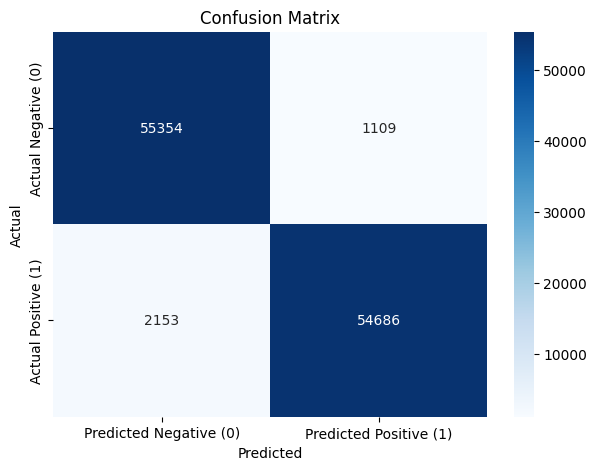

In [51]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
#customised predictions#
transaction_data = pd.DataFrame({
    'Time': [16],
    'V1': [1.322707269],
    'V2': [-0.174040833],
    'V3': [0.434555031],
    'V4': [0.576037652],
    'V5': [-0.836758046],
    'V6': [-0.831083411],
    'V7': [-0.264904961],
    'V8': [-0.220981943],
    'V9': [-1.071424618],
    'V10': [0.868558548],
    'V11': [-0.64150629],
    'V12': [-0.111315775],
    'V13': [0.36148541],
    'V14': [0.171945122],
    'V15': [0.782166532],
    'V16': [-1.35587073],
    'V17': [-0.216935153],
    'V18': [1.271765385],
    'V19': [-1.240621935],
    'V20': [-0.522950941],
    'V21': [-0.284375572],
    'V22': [-0.323357411],
    'V23': [-0.037709905],
    'V24': [0.347150939],
    'V25': [0.559639137],
    'V26': [-0.280158166],
    'V27': [0.042335258],
    'V28': [0.0288223],
    'Amount': [0],
    'Class': [0]
})

In [53]:
transaction_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,16,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,...,-0.284376,-0.323357,-0.03771,0.347151,0.559639,-0.280158,0.042335,0.028822,0,0


In [54]:
new_predictions = logistic_model.predict(transaction_data.drop(columns=['Class']))

if new_predictions[0] == 1:
    print("Time: 16\nPredict: Fraudulent Transaction")
else:
    print("Time: 16\nPredict: Genuine Transaction")

Time: 16
Predict: Genuine Transaction


In [55]:
#generating 28 random transactions & predict transactions#
#define minimum and maximum 'time' values from training data#
min_time = transaction_data['Time'].min()
max_time = transaction_data['Time'].max()

random_transactions = []

#generate 28 random transactions#
for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time),
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform(-2, 2),
        'V2': np.random.uniform(-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform(-2, 2),
        'V5': np.random.uniform(-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform(-2, 2),
        'V16': np.random.uniform(-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform(-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform(-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform(-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform(-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)


random_data = pd.DataFrame(random_transactions, columns=X_train.columns)
random_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,16.0,0.845456,-1.977133,0.750251,-1.465510,0.601246,-1.792964,0.509059,0.090756,0.377437,...,1.251639,0.742901,-0.193385,-0.719057,-1.557204,0.538680,-0.191456,-0.949301,0.337688,417.322997
1,16.0,0.861518,-1.771894,0.284315,-1.368281,-0.497348,1.240903,1.548833,0.936960,-0.543294,...,-1.126556,-1.348143,0.706330,-0.595379,1.697352,0.530411,0.265224,-1.689861,0.368915,92.597159
2,16.0,0.213933,1.503085,-1.694598,0.416404,0.653267,-0.766177,0.240234,-1.318182,0.573739,...,0.168256,0.337527,-1.468804,0.273279,-1.434145,-1.622918,0.507296,0.965692,-1.146281,52.650152
3,16.0,1.723034,1.646034,-0.347191,0.356767,-0.751579,1.541748,0.593500,-1.314183,-1.307272,...,0.621728,-0.982699,0.897474,0.764199,-1.152953,0.709719,1.724596,1.203580,-1.106743,115.274496
4,16.0,1.801263,-0.062933,-1.683355,1.009143,1.099946,-0.651581,1.807286,1.716037,0.782366,...,0.121412,-0.041873,-1.308507,-0.826041,-1.139092,1.748966,1.866513,1.326338,-0.852163,320.046569
5,16.0,-1.529697,0.915048,-0.526475,-0.027541,0.941963,-1.322717,-1.247883,-0.155992,-0.467098,...,-1.073689,0.045191,0.337493,-0.947976,-0.809301,-0.465922,-0.614565,0.652358,-1.405360,126.462037
6,16.0,0.899039,1.372648,0.873580,0.105792,1.721088,-1.975917,-1.102171,0.004757,0.590258,...,1.706107,1.385027,1.183587,0.291882,-1.162772,-0.087456,-1.789151,-0.024164,-1.409392,370.699676
7,16.0,-0.601405,-0.891695,1.755451,-1.683477,1.182638,1.661672,1.696990,1.976385,-0.268324,...,1.324809,0.935561,1.624920,1.110034,0.650737,-1.878411,1.698183,-0.989716,1.860683,15.609365
8,16.0,-0.620795,0.305239,-1.630767,1.634334,-0.827607,-1.837629,-1.818741,-1.335882,0.164695,...,0.413069,-0.240838,1.377396,-0.967421,1.865952,1.246085,0.751355,-0.915408,0.572065,187.535918
9,16.0,-1.527130,-0.892633,1.232339,-1.830921,0.304474,-0.892216,0.569289,1.417507,0.074881,...,1.806038,0.398384,1.785496,-1.956310,0.410513,-0.288598,1.132694,0.338001,0.581569,175.026679


In [56]:
random_predictions = logistic_model.predict(random_data)

for i, prediction in enumerate(random_predictions):
    if prediction == 0:
        print(f"Transaction {i + 1}: Genuine Transaction")
    else:
        print(f"Transaction {i + 1}: Fraudulent Transaction")

Transaction 1: Genuine Transaction
Transaction 2: Genuine Transaction
Transaction 3: Fraudulent Transaction
Transaction 4: Fraudulent Transaction
Transaction 5: Fraudulent Transaction
Transaction 6: Genuine Transaction
Transaction 7: Fraudulent Transaction
Transaction 8: Genuine Transaction
Transaction 9: Fraudulent Transaction
Transaction 10: Fraudulent Transaction
Transaction 11: Genuine Transaction
Transaction 12: Genuine Transaction
Transaction 13: Fraudulent Transaction
Transaction 14: Genuine Transaction
Transaction 15: Genuine Transaction
Transaction 16: Fraudulent Transaction
Transaction 17: Fraudulent Transaction
Transaction 18: Fraudulent Transaction
Transaction 19: Genuine Transaction
Transaction 20: Genuine Transaction
Transaction 21: Fraudulent Transaction
Transaction 22: Genuine Transaction
Transaction 23: Genuine Transaction
Transaction 24: Genuine Transaction
Transaction 25: Fraudulent Transaction
Transaction 26: Genuine Transaction
Transaction 27: Fraudulent Transactio

In [57]:
#ROC_AUC curve#
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test)[:, 1]
y_scores

array([0.98305363, 0.04339851, 0.00485116, ..., 1.        , 0.00190762,
       0.05054953])

In [58]:
logistic_model.predict_proba(X_test)

array([[1.69463725e-02, 9.83053627e-01],
       [9.56601493e-01, 4.33985067e-02],
       [9.95148842e-01, 4.85115839e-03],
       ...,
       [2.59079203e-10, 1.00000000e+00],
       [9.98092381e-01, 1.90761931e-03],
       [9.49450468e-01, 5.05495323e-02]])

In [59]:
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

In [60]:
fpr

array([0.00000000e+00, 7.08428528e-05, 7.08428528e-05, ...,
       7.75782371e-01, 7.75782371e-01, 1.00000000e+00])

In [61]:
tpr

array([0.        , 0.40605922, 0.41693204, ..., 0.99998241, 1.        ,
       1.        ])

In [62]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       5.30662586e-03, 5.30611529e-03, 3.53183998e-06])

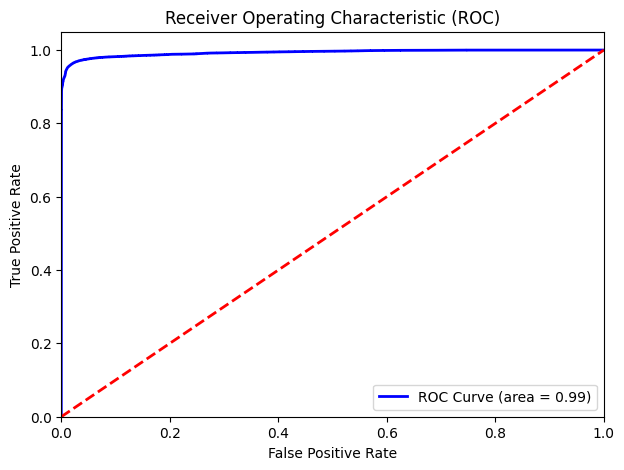

In [63]:
#calculate ROC-AUC score and plot ROC curve#
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
